#### **5. Vector Norm**
- Compute the $\(L_1\)$ and $\(L_2\)$ norms of different vectors representing images.
- Normalize the vectors using their respective norms and observe how the image changes.
- Compare the norms and discuss their applications in machine learning problems.

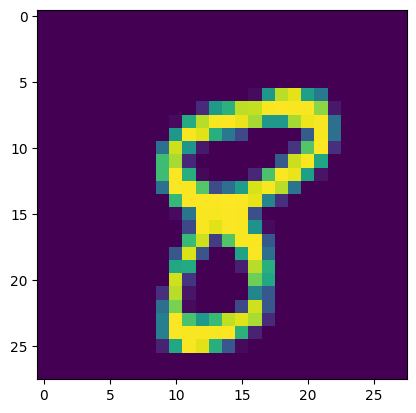

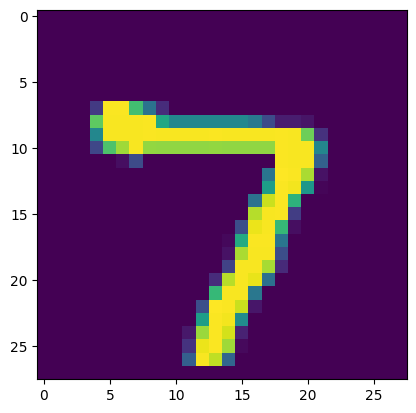

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

MNIST_path = '../MNIST_data'

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(MNIST_path, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

# get some random training images and their labels, when we use next dataiter it returns the next batch ( we defined as 64 imagens )
dataiter = iter(train_loader)
images, labels = next(dataiter)

img1 = images[0].numpy()
img1 = np.transpose(img1, (1, 2, 0))

img2 = images[1].numpy()
img2 = np.transpose(img2, (1, 2, 0))

plt.imshow(img1)
plt.show()

plt.imshow(img2)
plt.show()

In [4]:
# Calculate the L1 and L2 norms of different vectors representing images

v1 = np.reshape(img1, (784, 1))

l1_norm_v1 = np.linalg.norm(v1, 1)
l2_norm_v1 = np.linalg.norm(v1, 2)

print("L1 norm of v1:", l1_norm_v1)
print("L2 norm of v1:", l2_norm_v1)

L1 norm of v1: 527.7704
L2 norm of v1: 26.688429


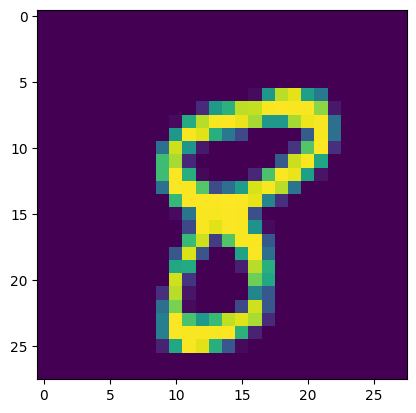

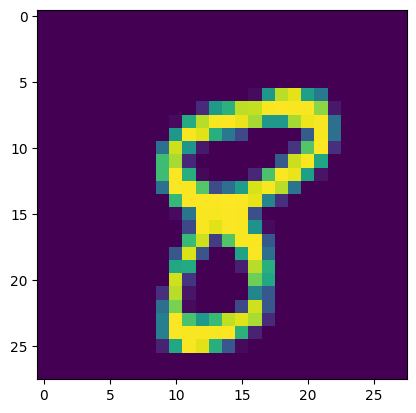

In [7]:
# Normalize the vectors using their respective norms and observe how the image changes

v1_normalized = v1 / l1_norm_v1
v1_normalized2 = v1 / l2_norm_v1

img1_normalized = np.reshape(v1_normalized, (28, 28))
img1_normalized2 = np.reshape(v1_normalized2, (28, 28))

plt.imshow(img1_normalized)
plt.show()

plt.imshow(img1_normalized2)
plt.show()

# We can see image doesn't change when we normalize it using L1 and L2 norms.

# **6. Orthogonal Matrices**
- Generate a random orthogonal matrix \(Q\) (\(Q^T Q = I\)).
- Multiply the matrix \(Q\) by a flattened image vector (\(v \in \mathbb{R}^{784}\)).
- Verify that the transformation does not alter the vector's length (a property preserved by orthogonal matrices).

In [9]:
import numpy as np

# Passo 1: Gere uma matriz aleatória 784x784
A = np.random.randn(784, 784)

# Passo 2: Aplique a decomposição QR
Q, R = np.linalg.qr(A)

# Passo 3: Verifique se Q é ortogonal
# Q^T Q deve ser aproximadamente igual à identidade
assert np.allclose(Q.T @ Q, np.eye(784)), "Q is not orthogonal"
print("Q is orthogonal!")

Q is orthogonal!


In [14]:
# Multiply the matrix Q by a flattened image vector

v = np.reshape(img1, (784, 1))

# Passo 4: Multiplique a matriz Q pela imagem
v_transformed = np.matmul(Q, v)

# Passo 5: Verifique se o comprimento da imagem alterou
assert np.allclose(np.linalg.norm(v_transformed), np.linalg.norm(v)), "Image length is not preserved"

print("Image length is preserved!")

Image length is preserved!
